In [1]:
!pip install roboflow

                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="lDlEcfufgIlHqz98cnfX")
project = rf.workspace("bangpham").project("detectvehicle")
version = project.version(7)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DetectVehicle-7 in yolov11:: 100%|██████████| 4018/4018 [00:00<00:00, 4455.11it/s]


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 45.8 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
model = YOLO("yolo12n.pt")


100%|██████████| 5.34M/5.34M [00:00<00:00, 400MB/s]


In [7]:

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="/kaggle/working/DetectVehicle-7/data.yaml", epochs=100, imgsz=640)



Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.pt, data=/kaggle/working/DetectVehicle-7/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 156MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 202MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/DetectVehicle-7/train/labels... 1434 images, 7 backgrounds, 0 corrupt: 100%|██████████| 1434/1434 [00:01<00:00, 1181.23it/s]

train: New cache created: /kaggle/working/DetectVehicle-7/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 3709. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /kaggle/working/DetectVehicle-7/valid/labels... 382 images, 0 backgrounds, 0 corrupt: 100%|██████████| 382/382 [00:00<00:00, 585.46it/s]


val: New cache created: /kaggle/working/DetectVehicle-7/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 1110. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.46G      1.263      2.759      1.297         43        640: 100%|██████████| 90/90 [00:38<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.99it/s]


                   all        382       1110      0.766       0.21      0.437      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.46G      1.345      1.896      1.388         58        640: 100%|██████████| 90/90 [00:37<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]


                   all        382       1110      0.369      0.337      0.311       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.45G      1.389      1.861      1.437         50        640: 100%|██████████| 90/90 [00:36<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]


                   all        382       1110      0.535      0.308      0.283      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.46G      1.375      1.758      1.409         48        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]


                   all        382       1110      0.541      0.393      0.355      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.42G      1.354      1.657      1.418         46        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]


                   all        382       1110      0.562      0.511      0.511      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.46G      1.319      1.584      1.379         46        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]


                   all        382       1110      0.626      0.482      0.504       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.45G      1.328      1.499      1.373         34        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.61it/s]


                   all        382       1110      0.554      0.591      0.573       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.45G       1.33      1.458      1.392         54        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]


                   all        382       1110      0.687      0.444      0.523        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.41G      1.275      1.398      1.354         45        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]


                   all        382       1110      0.593      0.584      0.592      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.46G      1.273      1.343       1.33         54        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]


                   all        382       1110      0.638      0.563      0.565      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.44G      1.262      1.327      1.331         40        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]

                   all        382       1110      0.622      0.595      0.604      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.46G      1.249      1.293      1.314         43        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.61it/s]


                   all        382       1110      0.568      0.599      0.619      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.46G      1.251      1.252       1.31         54        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]

                   all        382       1110      0.699      0.614      0.655      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.46G      1.231      1.244      1.306         71        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]

                   all        382       1110      0.653      0.627      0.701      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.46G      1.198      1.202      1.286         45        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]


                   all        382       1110      0.609      0.609      0.647       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.45G      1.214      1.187      1.281         30        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.84it/s]

                   all        382       1110       0.65      0.581      0.633      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.44G      1.176      1.181      1.283         41        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.84it/s]

                   all        382       1110        0.6      0.536      0.585       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.46G      1.187      1.144      1.278         66        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]


                   all        382       1110      0.686      0.641      0.694      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.46G      1.159      1.096      1.254         62        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]


                   all        382       1110        0.7      0.613      0.686      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.45G       1.15      1.094      1.254         46        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]

                   all        382       1110      0.622      0.619      0.677      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.46G      1.166      1.081      1.256         52        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]

                   all        382       1110      0.649       0.66      0.692      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.46G      1.159      1.082      1.249         32        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]

                   all        382       1110      0.713      0.616      0.692      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       3.4G      1.152      1.053      1.241         37        640: 100%|██████████| 90/90 [00:36<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]


                   all        382       1110      0.689      0.684       0.71      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.46G      1.129      1.014      1.224         37        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]

                   all        382       1110      0.739      0.656       0.73      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.4G      1.132      1.025      1.231         36        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]

                   all        382       1110      0.684       0.61      0.667      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.43G      1.137      1.031      1.235         59        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]

                   all        382       1110      0.747      0.646      0.723       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.46G      1.082     0.9827      1.207         39        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]


                   all        382       1110      0.744      0.648       0.75      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.45G      1.103     0.9814       1.22         44        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]

                   all        382       1110      0.665      0.664      0.701      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.45G      1.086     0.9388      1.195         39        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]

                   all        382       1110      0.743      0.623      0.699      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.46G      1.105     0.9521      1.216         48        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]

                   all        382       1110      0.736      0.671      0.766      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.46G      1.075     0.9606      1.204         39        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]


                   all        382       1110      0.717      0.733      0.777       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.46G      1.075     0.9488      1.192         59        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]

                   all        382       1110      0.756      0.645      0.728      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       3.4G       1.07     0.9207      1.195         48        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]

                   all        382       1110      0.788      0.719      0.778      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.46G      1.073     0.9132      1.194         51        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]

                   all        382       1110       0.75      0.733       0.77      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.45G      1.075     0.9378      1.201         59        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.53it/s]

                   all        382       1110      0.777      0.682      0.765      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.46G      1.069     0.9454      1.193         74        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]

                   all        382       1110      0.732       0.69      0.773      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       3.4G       1.06     0.8972      1.198         45        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]

                   all        382       1110      0.713      0.707      0.738      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       3.4G      1.045     0.8812      1.178         44        640: 100%|██████████| 90/90 [00:36<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.99it/s]

                   all        382       1110      0.815      0.658      0.771      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.45G      1.059      0.888       1.18         68        640: 100%|██████████| 90/90 [00:36<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]

                   all        382       1110      0.718      0.716      0.771      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.43G      1.034     0.8356      1.167         31        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]

                   all        382       1110      0.775      0.724      0.772      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.46G      1.032     0.8534      1.165         43        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]

                   all        382       1110      0.759      0.678      0.755        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.45G      1.043      0.846      1.175         50        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]

                   all        382       1110      0.755      0.715      0.771      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.45G      1.026     0.8327      1.169         50        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]


                   all        382       1110      0.795      0.674      0.771      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.46G      1.032     0.8648      1.185         61        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]

                   all        382       1110      0.737      0.681      0.755      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       3.4G      1.027     0.8464      1.167         36        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]

                   all        382       1110      0.739      0.737      0.778      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.46G      1.013     0.8195      1.159         44        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]

                   all        382       1110        0.8      0.691      0.783       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.45G      1.021     0.8305      1.161         36        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]

                   all        382       1110      0.696      0.752      0.774      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.45G     0.9947     0.7967      1.146         27        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]

                   all        382       1110      0.789      0.701      0.787       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.43G      1.005     0.8061      1.157         59        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]

                   all        382       1110      0.759      0.721      0.768      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.43G     0.9896     0.7938      1.149         35        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]

                   all        382       1110      0.709      0.723      0.762      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.45G     0.9917     0.7869      1.147         54        640: 100%|██████████| 90/90 [00:36<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]

                   all        382       1110      0.753      0.681      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.46G     0.9856     0.7789       1.14         32        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]

                   all        382       1110      0.712      0.712      0.737      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.45G      0.982      0.777      1.142         41        640: 100%|██████████| 90/90 [00:36<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]

                   all        382       1110      0.718      0.718      0.753      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       3.4G     0.9893     0.7697      1.136         41        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]

                   all        382       1110      0.745      0.722      0.765      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.46G     0.9742     0.7639      1.141         33        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]


                   all        382       1110      0.798       0.67      0.747      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.45G     0.9771     0.7757      1.145         56        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]

                   all        382       1110      0.729       0.74      0.782      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       3.4G     0.9706     0.7474      1.136         62        640: 100%|██████████| 90/90 [00:37<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]

                   all        382       1110      0.843      0.714      0.802      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.46G     0.9532     0.7282      1.129         40        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]

                   all        382       1110      0.755      0.716      0.762      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.43G     0.9604     0.7328      1.122         46        640: 100%|██████████| 90/90 [00:37<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]

                   all        382       1110      0.797      0.705      0.792      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.43G     0.9621     0.7364      1.123         76        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]

                   all        382       1110      0.832      0.669       0.78      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       3.4G     0.9439     0.7245      1.121         47        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]

                   all        382       1110      0.792      0.716      0.776      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.45G     0.9507     0.7339      1.123         64        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]

                   all        382       1110        0.8       0.72      0.799      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.44G     0.9563     0.7248      1.125         48        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]

                   all        382       1110      0.803      0.678      0.779      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.46G     0.9341     0.7196      1.122         35        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]

                   all        382       1110      0.783      0.747      0.809       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.45G     0.9237     0.6935      1.108         51        640: 100%|██████████| 90/90 [00:37<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.99it/s]

                   all        382       1110       0.75      0.717      0.781      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.46G     0.9276     0.6976      1.115         57        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]

                   all        382       1110      0.823      0.706       0.79      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.39G     0.9324     0.7016      1.111         43        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]

                   all        382       1110      0.794      0.705      0.771      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.46G     0.9323     0.6826      1.103         46        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]

                   all        382       1110      0.832       0.71      0.796      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.46G      0.918     0.6766      1.107         47        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]

                   all        382       1110      0.802      0.715      0.779      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.46G     0.9145      0.679      1.103         40        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]

                   all        382       1110      0.847      0.709      0.809      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.46G     0.9143     0.6746      1.087         45        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]

                   all        382       1110       0.84      0.683      0.791      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.45G      0.904     0.6657       1.09         54        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]

                   all        382       1110      0.762      0.731      0.807      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.44G     0.8804     0.6755      1.095         38        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.03it/s]

                   all        382       1110      0.752      0.745      0.797      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.46G     0.8608     0.6379       1.08         20        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]

                   all        382       1110      0.756       0.77      0.797      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.44G      0.891     0.6384      1.079         49        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]

                   all        382       1110      0.811      0.718      0.795      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.43G     0.9018      0.646      1.085         54        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]

                   all        382       1110      0.822      0.709      0.786      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.45G      0.883     0.6327      1.081         59        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]

                   all        382       1110      0.769      0.731        0.8      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.46G     0.8917     0.6363      1.085         46        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]

                   all        382       1110      0.799      0.762      0.811      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.46G     0.8895     0.6354      1.077         58        640: 100%|██████████| 90/90 [00:37<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]

                   all        382       1110      0.777      0.757       0.78      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.46G     0.8827     0.6204      1.074         48        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]

                   all        382       1110      0.773      0.725      0.783      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.46G     0.8519     0.6109      1.058         41        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]

                   all        382       1110      0.845      0.704      0.798      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.46G     0.8709     0.6201       1.07         49        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]

                   all        382       1110       0.81      0.746      0.808      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.46G     0.8759     0.6224       1.08         52        640: 100%|██████████| 90/90 [00:37<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]

                   all        382       1110      0.798      0.733      0.793      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.45G       0.86     0.6074      1.065         36        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]

                   all        382       1110      0.787      0.739        0.8      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.45G     0.8421     0.5986      1.065         47        640: 100%|██████████| 90/90 [00:37<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]

                   all        382       1110      0.818      0.727      0.803      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.45G     0.8477     0.5988      1.062         34        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]

                   all        382       1110      0.811      0.748      0.814      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.43G     0.8477     0.6013      1.066         46        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]

                   all        382       1110      0.824      0.717      0.805      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.43G     0.8242     0.5747      1.052         29        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]

                   all        382       1110      0.796      0.731      0.814      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.43G     0.8262     0.5809      1.054         33        640: 100%|██████████| 90/90 [00:36<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]

                   all        382       1110      0.783      0.755       0.81      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       3.4G     0.8304     0.5671      1.047         37        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        382       1110      0.788      0.745       0.81      0.561


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.42G     0.8333     0.5262       1.05         24        640: 100%|██████████| 90/90 [00:37<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]

                   all        382       1110      0.845      0.696      0.801      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.42G      0.813     0.5107       1.04         24        640: 100%|██████████| 90/90 [00:36<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]

                   all        382       1110      0.778      0.742        0.8       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.46G     0.7967     0.4963      1.032         12        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]

                   all        382       1110      0.811      0.733      0.804      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.43G     0.7896     0.4895      1.027         34        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.84it/s]

                   all        382       1110      0.852      0.705      0.812      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.45G     0.7749     0.4747      1.023         21        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.07it/s]

                   all        382       1110      0.831      0.744      0.812       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.44G     0.7743      0.474      1.025         13        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.03it/s]

                   all        382       1110      0.844      0.733      0.804      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.44G     0.7776     0.4744      1.021         21        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]

                   all        382       1110      0.796      0.766      0.809      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.42G     0.7694       0.47      1.022         13        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]

                   all        382       1110      0.815      0.753      0.806      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.43G      0.762     0.4621      1.016         19        640: 100%|██████████| 90/90 [00:36<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]

                   all        382       1110      0.802      0.762       0.81       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.43G     0.7586     0.4563      1.018         24        640: 100%|██████████| 90/90 [00:36<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]

                   all        382       1110      0.809      0.763      0.807       0.56



100 epochs completed in 1.119 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12n summary (fused): 159 layers, 2,557,703 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.36it/s]


                   all        382       1110      0.797      0.731      0.814      0.565
               Bicycle         15         23      0.803      0.783      0.874      0.615
                   Bus         38         54      0.796      0.667      0.764       0.63
                   Car        245        647      0.806      0.808      0.855      0.633
            Motorcycle         94        244      0.792      0.687      0.796      0.407
                 Truck        114        142      0.791      0.711      0.782      0.542


invalid value encountered in less
invalid value encountered in less


Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


In [12]:
results = model("/kaggle/working/DetectVehicle-7/test/images/118_jpg.rf.2ddc3c16ab636ace2c1e46632b8efeed.jpg")



image 1/1 /kaggle/working/DetectVehicle-7/test/images/118_jpg.rf.2ddc3c16ab636ace2c1e46632b8efeed.jpg: 384x640 6 Cars, 50.7ms
Speed: 1.9ms preprocess, 50.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


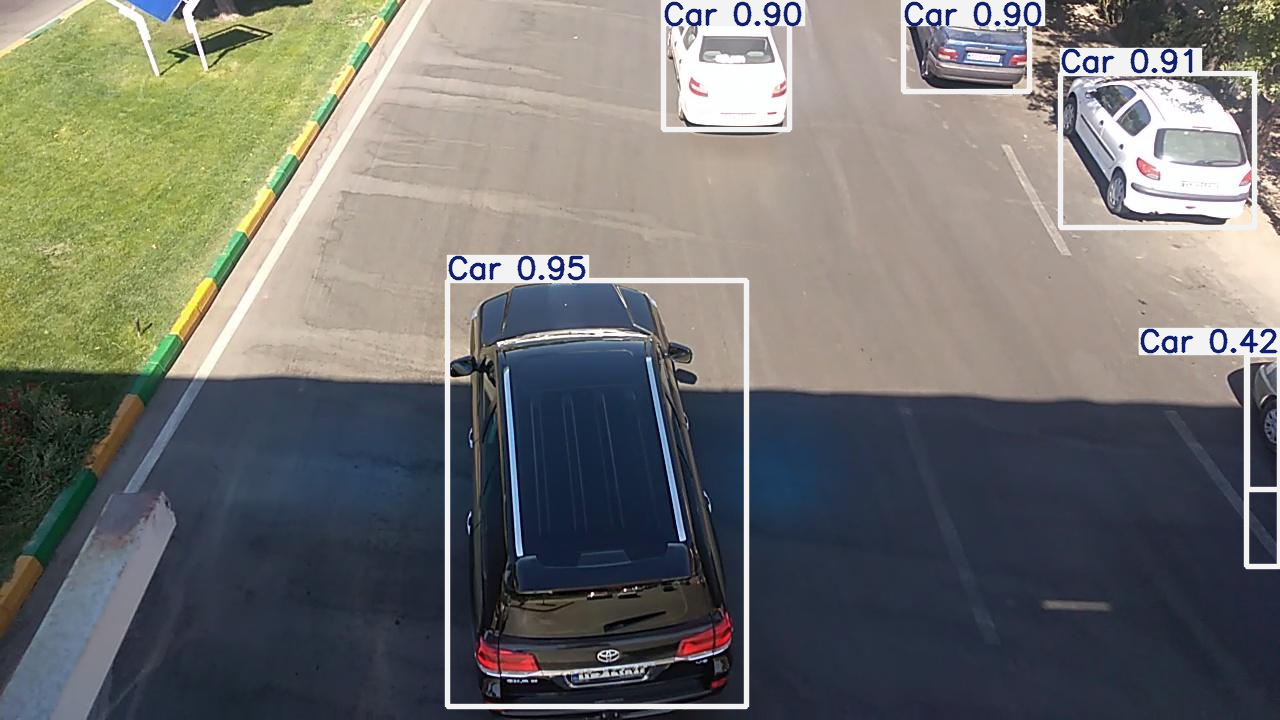

In [13]:
for result in results:
    result.show()

# Test